# 二手车价格预测     

used_car_train_20200313.csv     used_car_testB_20200421.csv     数据来自某交易平台的二手车交易记录     https://tianchi.aliyun.com/competition/entrance/231784/introduction     ToDo：给你一辆车的各个属性（除了price字段），预测它的价格     使用神经网络来完成预测

In [104]:
import pandas as pd
import numpy as np

In [105]:
# 数据加载
train_data = pd.read_csv('./used_car_train_20200313.csv',sep=' ')
train_data

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149995,163978,20000607,121.0,10,4.0,0.0,1.0,163,15.0,...,0.280264,0.000310,0.048441,0.071158,0.019174,1.988114,-2.983973,0.589167,-1.304370,-0.302592
149996,149996,184535,20091102,116.0,11,0.0,0.0,0.0,125,10.0,...,0.253217,0.000777,0.084079,0.099681,0.079371,1.839166,-2.774615,2.553994,0.924196,-0.272160
149997,149997,147587,20101003,60.0,11,1.0,1.0,0.0,90,6.0,...,0.233353,0.000705,0.118872,0.100118,0.097914,2.439812,-1.630677,2.290197,1.891922,0.414931
149998,149998,45907,20060312,34.0,10,3.0,1.0,0.0,156,15.0,...,0.256369,0.000252,0.081479,0.083558,0.081498,2.075380,-2.633719,1.414937,0.431981,-1.659014


In [139]:
train_data['regDate']

0         20040402
1         20030301
2         20040403
3         19960908
4         20120103
            ...   
149995    20000607
149996    20091102
149997    20101003
149998    20060312
149999    19990204
Name: regDate, Length: 150000, dtype: int64

In [140]:
np.min(train_data['regDate'])

19910001

In [141]:
# 汽车的展示时间
# temp = pd.to_datetime(train_data['regDate'],format='%Y%m%d',errors='coerce') # 0月会有异常，coerce避免异常
# temp

0        2004-04-02
1        2003-03-01
2        2004-04-03
3        1996-09-08
4        2012-01-03
            ...    
149995   2000-06-07
149996   2009-11-02
149997   2010-10-03
149998   2006-03-12
149999   1999-02-04
Name: regDate, Length: 150000, dtype: datetime64[ns]

In [142]:
# print(np.min(train_data['regDate']))
# print(np.min(train_data['creatDate']))

19910001
20150618


In [143]:
# 设定一个差分的时间锚点，保证结果为正即可
# min_date = pd.to_datetime('19910101',format='%Y%m%d')
# min_date2 = pd.to_datetime('20150601',format='%Y%m%d')
# min_date,min_date2

(Timestamp('1991-01-01 00:00:00'), Timestamp('2015-06-01 00:00:00'))

In [144]:
# 将regDate（汽车注册）转换为时间diff
# train_data['regTime'] = (temp - min_date).dt.days # dt.days对datetime后的内容取天的数字
# train_data['regTime']

0         4840.0
1         4442.0
2         4841.0
3         2077.0
4         7672.0
           ...  
149995    3445.0
149996    6880.0
149997    7215.0
149998    5549.0
149999    2956.0
Name: regTime, Length: 150000, dtype: float64

In [145]:
# 将creatDate（汽车售卖）转换为汽车损耗时间（既时间diff）
# train_data['creatTime'] = (pd.to_datetime(train_data['creatDate'],format='%Y%m%d',errors='coerce')-min_date).dt.days
# # 汽车的使用时间
# train_data['usedTime'] = train_data['creatTime'] - train_data['regTime']

In [146]:
# (pd.to_datetime(train_data['creatDate'],format='%Y%m%d',errors='coerce')-min_date)

0        9225 days
1        9199 days
2        9223 days
3        9202 days
4        9203 days
            ...   
149995   9217 days
149996   9202 days
149997   9218 days
149998   9222 days
149999   9195 days
Name: creatDate, Length: 150000, dtype: timedelta64[ns]

In [106]:
# 提交数据格式读取
sample_data = pd.read_csv('./used_car_sample_submit.csv')
sample_data

,SaleID,price
0,150000,0
1,150001,0
2,150002,0
3,150003,0
4,150004,0
...,...,...
49995,199995,0
49996,199996,0
49997,199997,0
49998,199998,0


In [107]:
# test数据读取
test_data = pd.read_csv('./used_car_testB_20200421.csv',sep=' ')
test_data

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,200000,133777,20000501,67.0,0,1.0,0.0,0.0,101,15.0,...,0.236520,0.000241,0.105319,0.046233,0.094522,3.619512,-0.280607,-2.019761,0.978828,0.803322
1,200001,61206,19950211,19.0,6,2.0,0.0,0.0,73,6.0,...,0.261518,0.000000,0.120323,0.046784,0.035385,2.997376,-1.406705,-1.020884,-1.349990,-0.200542
2,200002,67829,20090606,5.0,5,4.0,0.0,0.0,120,5.0,...,0.261691,0.090836,0.000000,0.079655,0.073586,-3.951084,-0.433467,0.918964,1.634604,1.027173
3,200003,8892,20020601,22.0,9,1.0,0.0,0.0,58,15.0,...,0.236050,0.101777,0.098950,0.026830,0.096614,-2.846788,2.800267,-2.524610,1.076819,0.461610
4,200004,76998,20030301,46.0,6,0.0,NaN,0.0,116,15.0,...,0.257000,0.000000,0.066732,0.057771,0.068852,2.839010,-1.659801,-0.924142,0.199423,0.451014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,249995,111443,20041005,4.0,4,0.0,NaN,1.0,150,15.0,...,0.263668,0.000292,0.141804,0.076393,0.039272,2.072901,-2.531869,1.716978,-1.063437,0.326587
49996,249996,152834,20130409,65.0,1,0.0,0.0,0.0,179,4.0,...,0.255310,0.000991,0.155868,0.108425,0.067841,1.358504,-3.290295,4.269809,0.140524,0.556221
49997,249997,132531,20041211,4.0,4,0.0,0.0,1.0,147,12.5,...,0.262933,0.000318,0.141872,0.071968,0.042966,2.165658,-2.417885,1.370612,-1.073133,0.270602
49998,249998,143405,20020702,40.0,1,4.0,0.0,1.0,176,15.0,...,0.282106,0.000023,0.067483,0.067526,0.009006,2.030114,-2.939244,0.569078,-1.718245,0.316379


In [ ]:
print(np.min(test_data['regDate']))
print(np.min(test_data['creatDate']))

In [148]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 34 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SaleID             150000 non-null  int64  
 1   name               150000 non-null  int64  
 2   regDate            150000 non-null  int64  
 3   model              149999 non-null  float64
 4   brand              150000 non-null  int64  
 5   bodyType           145494 non-null  float64
 6   fuelType           141320 non-null  float64
 7   gearbox            144019 non-null  float64
 8   power              150000 non-null  int64  
 9   kilometer          150000 non-null  float64
 10  notRepairedDamage  150000 non-null  object 
 11  regionCode         150000 non-null  int64  
 12  seller             150000 non-null  int64  
 13  offerType          150000 non-null  int64  
 14  creatDate          150000 non-null  int64  
 15  price              150000 non-null  int64  
 16  v_

In [108]:
# -为缺失值，补全,分类任务众数补全
print(train_data['notRepairedDamage'].value_counts())
train_data['notRepairedDamage'].replace('-','0.0',inplace=True) # 0.0 直接在补全的过程中将object转换成float
train_data['notRepairedDamage'] = train_data['notRepairedDamage'].astype('float64')
print(train_data['notRepairedDamage'].value_counts())

0.0    111361
-       24324
1.0     14315
Name: notRepairedDamage, dtype: int64
0.0    135685
1.0     14315
Name: notRepairedDamage, dtype: int64


In [109]:
# object类型-为缺失值，补全,分类任务众数补全,类型转换成float
print(test_data['notRepairedDamage'].value_counts())
test_data['notRepairedDamage'].replace('-','0.0',inplace=True)
test_data['notRepairedDamage'] = test_data['notRepairedDamage'].astype('float64')
print(test_data['notRepairedDamage'].value_counts())

0.0    37224
-       8069
1.0     4707
Name: notRepairedDamage, dtype: int64
0.0    45293
1.0     4707
Name: notRepairedDamage, dtype: int64


常用补全有众数、中位数、KNN补全，补全后的可以作为新列特征

In [199]:
train_data.power.value_counts()

0       12829
75       9593
150      6495
60       6374
140      5963
        ...  
1597        1
1596        1
572         1
316         1
575         1
Name: power, Length: 566, dtype: int64

In [200]:
train_data['power'][train_data['power']>600]=600
print(train_data['power'].describe())
test_data['power'][test_data['power']>600]=600
print(test_data['power'].describe())

count    150000.000000
mean        116.860973
std          70.075256
min           0.000000
25%          75.000000
50%         110.000000
75%         150.000000
max         600.000000
Name: power, dtype: float64
count    50000.00000
mean       116.51788
std         70.48107
min          0.00000
25%         75.00000
50%        110.00000
75%        150.00000
max        600.00000
Name: power, dtype: float64


<ipython-input-200-eaa3f0819c70>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['power'][train_data['power']>600]=600
<ipython-input-200-eaa3f0819c70>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['power'][test_data['power']>600]=600


In [110]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SaleID             150000 non-null  int64  
 1   name               150000 non-null  int64  
 2   regDate            150000 non-null  int64  
 3   model              149999 non-null  float64
 4   brand              150000 non-null  int64  
 5   bodyType           145494 non-null  float64
 6   fuelType           141320 non-null  float64
 7   gearbox            144019 non-null  float64
 8   power              150000 non-null  int64  
 9   kilometer          150000 non-null  float64
 10  notRepairedDamage  150000 non-null  float64
 11  regionCode         150000 non-null  int64  
 12  seller             150000 non-null  int64  
 13  offerType          150000 non-null  int64  
 14  creatDate          150000 non-null  int64  
 15  price              150000 non-null  int64  
 16  v_

In [111]:
# 查看数据的缺失值
train_data.isnull().sum()

SaleID                  0
name                    0
regDate                 0
model                   1
brand                   0
bodyType             4506
fuelType             8680
gearbox              5981
power                   0
kilometer               0
notRepairedDamage       0
regionCode              0
seller                  0
offerType               0
creatDate               0
price                   0
v_0                     0
v_1                     0
v_2                     0
v_3                     0
v_4                     0
v_5                     0
v_6                     0
v_7                     0
v_8                     0
v_9                     0
v_10                    0
v_11                    0
v_12                    0
v_13                    0
v_14                    0
dtype: int64

In [112]:
train_data.shape,test_data.shape

((150000, 31), (50000, 30))

In [113]:
# 找到数值类型的特征
numerical_cols = train_data.select_dtypes(exclude='object').columns
numerical_cols

Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
       'seller', 'offerType', 'creatDate', 'price', 'v_0', 'v_1', 'v_2', 'v_3',
       'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12',
       'v_13', 'v_14'],
      dtype='object')

In [114]:
object_cols = train_data.select_dtypes(include='object').columns
object_cols

Index([], dtype='object')

In [115]:
feature_cols = [col for col in numerical_cols if col not in ['SaleID','price']]
feature_cols

['name',
 'regDate',
 'model',
 'brand',
 'bodyType',
 'fuelType',
 'gearbox',
 'power',
 'kilometer',
 'notRepairedDamage',
 'regionCode',
 'seller',
 'offerType',
 'creatDate',
 'v_0',
 'v_1',
 'v_2',
 'v_3',
 'v_4',
 'v_5',
 'v_6',
 'v_7',
 'v_8',
 'v_9',
 'v_10',
 'v_11',
 'v_12',
 'v_13',
 'v_14']

In [116]:
# feature_cols_test = [col for col in numerical_cols if col not in ['SaleID','price','regTime','creatTime','usedTime']]
# feature_cols_test

In [117]:
train_data

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149995,163978,20000607,121.0,10,4.0,0.0,1.0,163,15.0,...,0.280264,0.000310,0.048441,0.071158,0.019174,1.988114,-2.983973,0.589167,-1.304370,-0.302592
149996,149996,184535,20091102,116.0,11,0.0,0.0,0.0,125,10.0,...,0.253217,0.000777,0.084079,0.099681,0.079371,1.839166,-2.774615,2.553994,0.924196,-0.272160
149997,149997,147587,20101003,60.0,11,1.0,1.0,0.0,90,6.0,...,0.233353,0.000705,0.118872,0.100118,0.097914,2.439812,-1.630677,2.290197,1.891922,0.414931
149998,149998,45907,20060312,34.0,10,3.0,1.0,0.0,156,15.0,...,0.256369,0.000252,0.081479,0.083558,0.081498,2.075380,-2.633719,1.414937,0.431981,-1.659014


In [118]:
# 提取特征列
X_data = train_data[feature_cols]
Y_data = train_data['price']
X_test = test_data[feature_cols]

In [119]:
# 定义统计函数，方便了解数据分布
def show_stats(data):
    print('min',np.min(data))
    print('max',np.max(data))
    print('最小值减最大值',np.ptp(data)) 
    print('mean',np.mean(data))
    print('标准差std',np.std(data))
    print('方差var',np.var(data))

In [120]:
# 训练集中的price
show_stats(Y_data)

min 11
max 99999
最小值减最大值 99988
mean 5923.327333333334
标准差std 7501.973469876635
方差var 56279605.942732885


In [121]:
X_data.isnull().sum()

name                    0
regDate                 0
model                   1
brand                   0
bodyType             4506
fuelType             8680
gearbox              5981
power                   0
kilometer               0
notRepairedDamage       0
regionCode              0
seller                  0
offerType               0
creatDate               0
v_0                     0
v_1                     0
v_2                     0
v_3                     0
v_4                     0
v_5                     0
v_6                     0
v_7                     0
v_8                     0
v_9                     0
v_10                    0
v_11                    0
v_12                    0
v_13                    0
v_14                    0
dtype: int64

In [122]:
# 缺失值用-1补全
X_data = X_data.fillna(-1)
X_test = X_test.fillna(-1)

In [123]:
# 欠拟合结果
# import xgboost as xgb
# model = xgb.XGBRegressor(n_estimators=500, learning_rate=0.01, max_depth=7)
# model.fit(X_data, Y_data)
# predict_y = model.predict(X_test)
# print("XGBoost预测结果统计情况：")
# show_stats(predict_y)

In [124]:
# 输出结果
# result = pd.DataFrame()
# result['SaleID'] = test_data['SaleID']
# result['price'] = predict_y
# result.loc[result['price']<11] = 11 # 用.loc方法赋值才可以
# result.to_csv('./ans_xgb.csv', index=False)

In [125]:
# 为了验证模型，对原数据进行分批，以计算模型的mae
# xgboost,lightGBM 两个模型融合，相加除以2
from sklearn.model_selection import train_test_split, GridSearchCV
x_train, x_val, y_train, y_val = train_test_split(X_data, Y_data, test_size=0.2)

In [126]:
def build_model_xgb(x_train, y_train):
    model = xgb.XGBRegressor(n_estimators=150, learning=0.1, max_depth=7)
    model.fit(x_train, y_train)
    return model

import lightgbm as lgb
def build_model_lgb(x_train, y_train):
    estimator = lgb.LGBMRegressor(n_estimators=150, num_leaves=127)
    # 设置超参数范围，对超参数进行网格搜索
    param_grid = {'learning_rate':[0.01, 0.05, 0.1, 0.2]}
    model = GridSearchCV(estimator, param_grid)
    model.fit(x_train, y_train)
    return model

In [128]:
from sklearn.metrics import mean_absolute_error
# xgb
model_xgb = build_model_xgb(x_train, y_train)
val_xgb = model_xgb.predict(x_val)
MAE_xgb = mean_absolute_error(y_val, val_xgb)
print('xgb validation MAE:', MAE_xgb)
# 全量数据
model_xgb2 = build_model_xgb(X_data, Y_data)
result_xgb = model_xgb2.predict(X_test)
print("XGBoost预测结果统计情况：")
show_stats(result_xgb)

[13:14:16] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { learning } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


xgb validation MAE: 605.8530661772967
[13:14:53] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { learning } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


XGBoost预测结果统计情况：
min -864.3164
max 94322.59
最小值减最大值 95186.91
mean 5906.6387
标准差std 7374.3193
方差var 54380584.0


In [129]:
# lgb训练
model_lgb = build_model_lgb(x_train, y_train)
val_lgb = model_lgb.predict(x_val)
MAE_lgb = mean_absolute_error(y_val, val_lgb)
print('lgb validation MAE:', MAE_lgb)
# 全量数据
model_lgb = build_model_lgb(X_data, Y_data)
result_lgb = model_lgb.predict(X_test)
print("lgb预测结果统计情况：")
show_stats(result_lgb)

lgb validation MAE: 574.5142108928364
XGBoost预测结果统计情况：
min -785.5819234940341
max 90698.94650635302
最小值减最大值 91484.52842984705
mean 5906.21916371564
标准差std 7359.909752864445
方差var 54168271.57030918


In [130]:
# 通过MAE的比重对lgb和xgb加权融合
# 1-意思是谁的mae小，就用谁的融合的权重大
predict_y = (1-MAE_lgb/(MAE_xgb+MAE_lgb))*result_lgb + (1-MAE_xgb/(MAE_xgb+MAE_lgb))*result_xgb

In [139]:
print('LGB权重：', 1-MAE_lgb/(MAE_xgb+MAE_lgb))
print('XGB权重：', 1-MAE_xgb/(MAE_xgb+MAE_lgb))

LGB权重： 0.5132750440872305
XGB权重： 0.48672495591276965


In [132]:
predict_y

array([1333.32214134, 1851.4280896 , 8375.46578101, ..., 5701.89289354,
       5129.35396464, 5553.00430142])

In [146]:
# 输出结果
result = pd.DataFrame()
result['SaleID'] = sample_data['SaleID']
result['price'] = predict_y
result.loc[result['price']<11, 'price'] = 11 # 用.loc方法赋值才可以

In [ ]:
result.loc[result['price']<11, 'price'] = 11 # 正确
result.loc[result['price']<11] = 11 # 错误

In [148]:
show_stats(result.price)

min 11.0
max 92133.6878682676
最小值减最大值 92122.6878682676
mean 5906.550073150059
标准差std 7357.8002743784855
方差var 54137224.877644114


In [147]:
result[result['price']==11]

,SaleID,price
1217,151217,11.0
2052,152052,11.0
2435,152435,11.0
5726,155726,11.0
9618,159618,11.0
9773,159773,11.0
11127,161127,11.0
11465,161465,11.0
12924,162924,11.0
17751,167751,11.0


In [149]:
show_stats(result.price)

min 11.0
max 92133.6878682676
最小值减最大值 92122.6878682676
mean 5906.550073150059
标准差std 7357.8002743784855
方差var 54137224.877644114


In [150]:
result.describe()

,SaleID,price
count,50000.000000,50000.000000
mean,174999.500000,5906.550073
std,14433.901067,7357.873853
min,150000.000000,11.000000
25%,162499.750000,1380.822808
50%,174999.500000,3246.707579
75%,187499.250000,7631.841200
max,199999.000000,92133.687868


In [152]:
result.to_csv('./lgb_xgb.csv', index=False)

# keras搭建神经网络

In [177]:
# 对X_data和X_test进行归一化
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(X_data.values)
y = Y_data
X_test = scaler.fit_transform(X_test)

In [158]:
# 非全量数据进行模型选型调试
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [192]:
from tensorflow import keras
model=keras.Sequential([
    keras.layers.Dense(250,activation='relu',input_shape=[len(feature_cols)]),
    keras.layers.Dense(250,activation='relu'),
    keras.layers.Dense(250,activation='relu'),
    keras.layers.Dense(1)
])
model.compile(loss='mean_absolute_error',optimizer='Adam')
history = model.fit(x_train,y_train,batch_size=1024, epochs=100, validation_data=(x_test, y_test), validation_freq=1)

Epoch 1/100
118/118 [==============================] - 1s 12ms/step - loss: 4929.2461 - val_loss: 4059.2163
Epoch 2/100
118/118 [==============================] - 1s 9ms/step - loss: 2915.0964 - val_loss: 1575.0320
Epoch 3/100
118/118 [==============================] - 1s 9ms/step - loss: 1363.0376 - val_loss: 1223.8140
Epoch 4/100
118/118 [==============================] - 1s 9ms/step - loss: 1147.8062 - val_loss: 1070.0308
Epoch 5/100
118/118 [==============================] - 1s 9ms/step - loss: 1034.6555 - val_loss: 982.0693
Epoch 6/100
118/118 [==============================] - 1s 9ms/step - loss: 955.8211 - val_loss: 919.5361
Epoch 7/100
118/118 [==============================] - 1s 9ms/step - loss: 903.4585 - val_loss: 873.4995
Epoch 8/100
118/118 [==============================] - 1s 8ms/step - loss: 861.8434 - val_loss: 848.1775
Epoch 9/100
118/118 [==============================] - 1s 9ms/step - loss: 829.6898 - val_loss: 812.7255
Epoch 10/100
118/118 [=======================

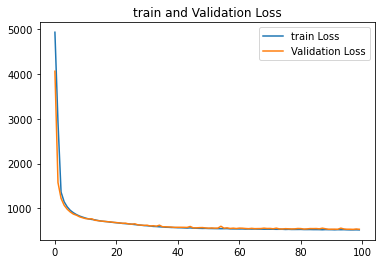

In [193]:
import matplotlib.pyplot as plt
# 绘图训练loss
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(loss, label='train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('train and Validation Loss')
plt.legend()
plt.show()

In [194]:
from sklearn.metrics import mean_absolute_error
print("训练集MAE:",mean_absolute_error(y_train,model.predict(x_train)))
print("验证集MAE:",mean_absolute_error(y_test,model.predict(x_test)))

训练集MAE: 520.2074674455282
验证集MAE: 534.4770679639181


In [195]:
# 全量数据
from tensorflow import keras
model=keras.Sequential([
    keras.layers.Dense(250,activation='relu',input_shape=[len(feature_cols)]),
    keras.layers.Dense(250,activation='relu'),
    keras.layers.Dense(250,activation='relu'),
    keras.layers.Dense(1)
])
model.compile(loss='mean_absolute_error',optimizer='Adam')
history2 = model.fit(x, y ,batch_size=1024, epochs=200)

Epoch 1/200
147/147 [==============================] - 1s 8ms/step - loss: 4762.1821
Epoch 2/200
147/147 [==============================] - 1s 8ms/step - loss: 2167.5889
Epoch 3/200
147/147 [==============================] - 1s 8ms/step - loss: 1223.9072
Epoch 4/200
147/147 [==============================] - 1s 8ms/step - loss: 1051.6530
Epoch 5/200
147/147 [==============================] - 1s 8ms/step - loss: 945.6614
Epoch 6/200
147/147 [==============================] - 1s 8ms/step - loss: 882.6482
Epoch 7/200
147/147 [==============================] - 1s 8ms/step - loss: 840.5568
Epoch 8/200
147/147 [==============================] - 1s 8ms/step - loss: 812.6485
Epoch 9/200
147/147 [==============================] - 1s 8ms/step - loss: 786.7043
Epoch 10/200
147/147 [==============================] - 1s 9ms/step - loss: 763.2664
Epoch 11/200
147/147 [==============================] - 1s 9ms/step - loss: 747.1034
Epoch 12/200
147/147 [==============================] - 1s 9ms/step - 

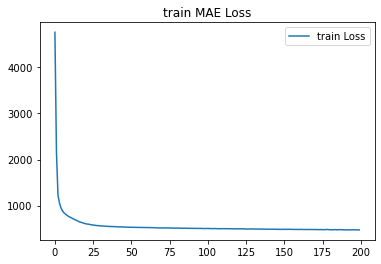

In [196]:
import matplotlib.pyplot as plt
# 绘图训练loss
loss = history2.history['loss']
plt.plot(loss, label='train Loss')
plt.title('train MAE Loss')
plt.legend()
plt.show()

In [201]:
# 模型参数
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 250)               7500      
_________________________________________________________________
dense_45 (Dense)             (None, 250)               62750     
_________________________________________________________________
dense_46 (Dense)             (None, 250)               62750     
_________________________________________________________________
dense_47 (Dense)             (None, 1)                 251       
Total params: 133,251
Trainable params: 133,251
Non-trainable params: 0
_________________________________________________________________


In [206]:
result_dnn = model.predict(X_test) # 记得这里应该放归一化以后的X_test数据
print("dnn预测结果统计情况：")
show_stats(result_dnn)

dnn预测结果统计情况：
min -133.19678
max 154805.83
最小值减最大值 154939.03
mean 10155.669
标准差std 13686.274
方差var 187314110.0


In [212]:
# 输出结果
result = pd.DataFrame()
result['SaleID'] = sample_data['SaleID']
result['price'] = result_dnn
result.loc[result['price']<11, 'price'] = 11 # 用.loc方法赋值才可以
result.loc[result['price']>99999, 'price'] = 99999

In [213]:
result

,SaleID,price
0,150000,2278.686035
1,150001,3272.602783
2,150002,18536.103516
3,150003,1326.294678
4,150004,3550.604492
...,...,...
49995,199995,12989.848633
49996,199996,38130.285156
49997,199997,10054.547852
49998,199998,8734.649414


In [214]:
result.to_csv('./dnn.csv', index=False)